<a href="https://colab.research.google.com/github/AnuragBalasahebChumble/PortfolioProjects/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# this will show pur graph below the cell
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Output/all_data.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###Question 1: What was the best month for sales? How much was earned that month?
###Approach
- We'll have to genrate the months column. 

In [ ]:
df['Month'] = df['Order Date'].str[:2]
df.Month

0          04
1         NaN
2          04
3          04
4          04
         ... 
186845     09
186846     09
186847     09
186848     09
186849     09
Name: Month, Length: 186850, dtype: object

In [ ]:
type(df.at[4, 'Month'])

str

In [ ]:
# We'll convert the str type to int
df['Month'] = df['Month'].astype('int')

ValueError: ignored

**To get rid of the error we'll have clean the data of nan value.** 

###Clean up the data
- drop the rows of nan

In [ ]:
nan_df = df[df['Order Date'].isna()]


In [ ]:
df = df.dropna(how='all')

In [ ]:
df['Month'] = df['Month'].astype('int')

ValueError: ignored

**Now, Error this is due to the different issue.**

In [ ]:
df[df.Month=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


**We'll genrate a new dataframe by omiting the Or values.**

In [ ]:
df = df[df.Month!='Or']

In [ ]:
df[df.Month=='or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


**All the Or values are omited**

In [ ]:
# We'll convert the str type to int, finally.
df['Month'] = df['Month'].astype('int')

In [ ]:
#Let's check the type aswell.
type(df.at[4, 'Month'])

numpy.int64

**So, we are good to go**

### Let's revesit the Question
### What was the best month for sales? How much was earned that month?
- We have added the Month column
- We'll also need Sales column.

In [ ]:
df.sample(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
80359,225866,Lightning Charging Cable,1,14.95,07/15/19 08:12,"318 Jackson St, Los Angeles, CA 90001",7
160906,265196,Flatscreen TV,1,300,10/06/19 00:10,"70 1st St, Boston, MA 02215",10
114911,171224,AAA Batteries (4-pack),2,2.99,03/02/19 01:43,"440 Spruce St, Atlanta, GA 30301",3
155659,260188,USB-C Charging Cable,1,11.95,10/19/19 14:44,"901 Park St, New York City, NY 10001",10


**Let's add sales column** 

In [ ]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

TypeError: ignored

- We have already got rid of NAN values
- I think this is dut to string type column entries in "columns that we are trying to calculate"
- Let's check the type of the columns in question.

In [ ]:
type(df.at[0, 'Quantity Ordered'])

str

In [ ]:
type(df.at[0, 'Price Each'])

str

In [ ]:
# to_numeric method of series is good and handels some fine details, like what numeric type to usem, eg int, float etc.
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each']) 

In [ ]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [ ]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
58557,153408,Bose SoundSport Headphones,1,99.99,02/01/19 18:29,"84 Lakeview St, San Francisco, CA 94016",2,99.99
162429,266662,Lightning Charging Cable,1,14.95,10/08/19 09:39,"451 Madison St, Los Angeles, CA 90001",10,14.95
18215,193936,AA Batteries (4-pack),2,3.84,04/23/19 10:51,"587 West St, San Francisco, CA 94016",4,7.68


In [ ]:
type(df.at[0, 'Price Each'])


numpy.float64

In [ ]:
type(df.at[0, 'Quantity Ordered'])

numpy.int64

**So,  to_numeric() method handled the data type change perfectly, be it float or numeric.**

###What was the best month for sales? How much was earned that month?

In [ ]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 1.0, 'Sales breakdown by month')

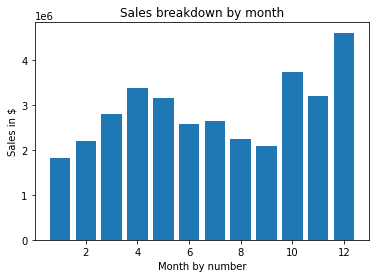

In [ ]:
months = range(1, 13)
plt.bar(months, df.groupby('Month').sum().Sales)

plt.xlabel('Month by number')
plt.ylabel('Sales in $')
plt.title('Sales breakdown by month')

###**Question 2**: What city had the highest number of sales? 
- Let's create a City column

In [1]:
df.sample(1)

NameError: ignored

### Using .apply()


In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [ ]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
30155,247927,Wired Headphones,1,11.99,2019-08-29 20:59:00,"957 1st St, Austin, TX 73301",8,11.99,Austin,20,59
93087,211295,Flatscreen TV,1,300.00,2019-06-29 18:04:00,"523 Highland St, San Francisco, CA 94016",6,300.00,San Francisco,18,4
88024,233200,34in Ultrawide Monitor,1,379.99,2019-07-21 08:45:00,"202 Maple St, Boston, MA 02215",7,379.99,Boston,8,45


**Power of .apply() Method**

In [ ]:
def get_city(add):
  return add.strip().split(',')[1]
df['Purchase Address'].apply(get_city)

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

**We also require state in city column**

In [ ]:
def get_city(add):
  return add.split(',')[1]

def get_state(add):
  return add.split(',')[2]

df['Purchase Address'].apply(lambda x : get_city(x)+" "+get_state(x))

0                 Dallas  TX 75001
2                 Boston  MA 02215
3            Los Angeles  CA 90001
4            Los Angeles  CA 90001
5            Los Angeles  CA 90001
                    ...           
186845       Los Angeles  CA 90001
186846     San Francisco  CA 94016
186847     San Francisco  CA 94016
186848     San Francisco  CA 94016
186849     San Francisco  CA 94016
Name: Purchase Address, Length: 185950, dtype: object

**Needs to get rid of pin code**

In [ ]:
def get_state_without_pin(add):
  return add.split(',')[2].strip().split(" ")[0]


In [ ]:
df['Purchase Address'].apply(lambda x : get_city(x)+" "+get_state_without_pin(x))

0                 Dallas TX
2                 Boston MA
3            Los Angeles CA
4            Los Angeles CA
5            Los Angeles CA
                ...        
186845       Los Angeles CA
186846     San Francisco CA
186847     San Francisco CA
186848     San Francisco CA
186849     San Francisco CA
Name: Purchase Address, Length: 185950, dtype: object

**We'll reformat it to look better**

In [ ]:
df['Purchase Address'].apply(lambda x : get_city(x)+"("+get_state_without_pin(x)+")")

0                 Dallas(TX)
2                 Boston(MA)
3            Los Angeles(CA)
4            Los Angeles(CA)
5            Los Angeles(CA)
                 ...        
186845       Los Angeles(CA)
186846     San Francisco(CA)
186847     San Francisco(CA)
186848     San Francisco(CA)
186849     San Francisco(CA)
Name: Purchase Address, Length: 185950, dtype: object

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x : get_city(x)+"("+get_state_without_pin(x)+")")

In [ ]:
df.City.head(2)

0     Dallas(TX)
2     Boston(MA)
Name: City, dtype: object

In [ ]:
df.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City,,,,,,
Atlanta(GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin(TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston(MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas(TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles(CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City(NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland(ME),2750,447189.25,17144,449758.27,35211,72856
Portland(OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco(CA),50239,8211461.74,315520,8262203.91,643265,1319477


Text(0.5, 1.0, 'Sales breakdown(City)')

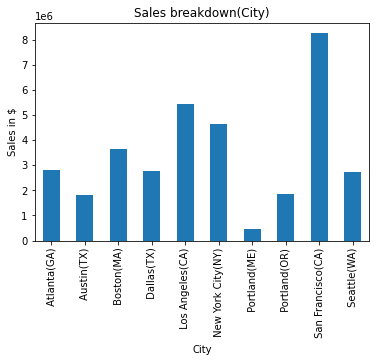

In [ ]:
df.groupby('City').sum().Sales.plot(kind='bar')

plt.ylabel('Sales in $')
plt.title('Sales breakdown(City)')


##Answer
- San Fransisco

###**Question 3**: What time is right to do advertisement to increase sales? 

In [ ]:
df.sample(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
159471,263824,AAA Batteries (4-pack),1,2.99,2019-10-17 21:47:00,"18 River St, New York City, NY 10001",10,2.99,New York City(NY),21,47
116765,172994,AAA Batteries (4-pack),1,2.99,2019-03-26 10:32:00,"994 5th St, Dallas, TX 75001",3,2.99,Dallas(TX),10,32


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.sample(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
76212,149494,Lightning Charging Cable,1,14.95,2019-01-12 15:40:00,"649 River St, Los Angeles, CA 90001",1,14.95,Los Angeles(CA),15,40


Text(0, 0.5, 'Number of Orders')

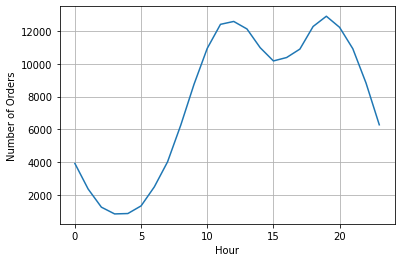

In [ ]:
df.groupby('Hour').count().Sales.plot(kind='line')
plt.grid()
plt.ylabel('Number of Orders')

##Answer
- I think it's better to show add when the people are shopping and are online. So the time should be between 9-AM to 8-PM. 

###**Question 4**: Which product is sold the most? 

**Approach**:
- Find all the duplicate order id. 

Text(0, 0.5, 'Quantity')

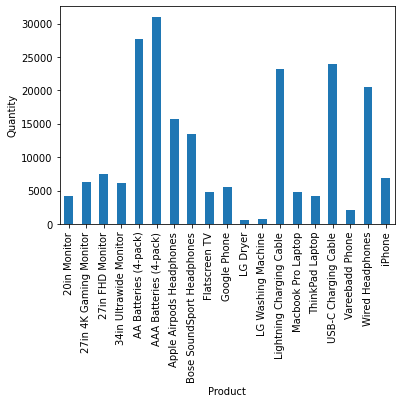

In [ ]:
df.groupby('Product').sum()['Quantity Ordered'].plot(kind='bar')
plt.ylabel('Quantity')

##Answer
- AA & AAA batteries, along with USB-charging cable are in great demand.